# WeatherPy
----

### Analysis
* Northern vs. Southern Hemispheres: One might expect temperatures to decline predictably with distance from the equator, however it seems that the northern hemisphere has more extremes, at least at this time of year.  The first graph, which is based on maximum temperatures, indicates that the northern half of the planet gets colder quicker. It also seems that a greater number of cities are in humid, windy and cloudy conditions than the southern hemisphere. This could be because of earth's tilt, however more analysis is needed to be sure.


In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import time
from datetime import datetime

# Import API key
# import api_key from config file
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [82]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [83]:
cities_df = pd.DataFrame(cities)

cities_df.head()

,0
0,rikitea
1,chuy
2,mecca
3,touros
4,ixtapa


In [84]:
cities_df.columns = ["City"]
cities_df.head()

,City
0,rikitea
1,chuy
2,mecca
3,touros
4,ixtapa


In [85]:
cities_df["Country"] = ""
cities_df["City ID"] = ""
cities_df['Latitude'] = ""
cities_df['Longitude'] = ""
cities_df['Temperature (F)'] = ""
cities_df['Humidity (%)'] = ""
cities_df['Cloudiness (%)'] = ""
cities_df['Wind Speed (mph)'] = ""

In [86]:
cities_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,,,,,,,,
1,chuy,,,,,,,,
2,mecca,,,,,,,,
3,touros,,,,,,,,
4,ixtapa,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed '(with the city number and city name).


In [87]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = api_key


# Build partial query URL
#{url}appid={api_key}&units={units}&q=
query_url = f"{url}&units={units}&APPID={api_key}&q="
query_url



'http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q='

In [88]:
print(f"Beginning Data Retrieval")
print(f"-------------------------------")



record = 1

for index, row in cities_df.iterrows():
    print(row['City'])
    try:


        cities_url = query_url + row["City"]
        cities_response = requests.get(cities_url).json()



        #city.append(response["name"])
        row["Country"] = cities_response["sys"]["country"]
        row["City ID"] = cities_response["sys"]["id"]
        row["Latitude"] = cities_response["coord"]["lat"]
        row["Longitude"] = cities_response["coord"]["lon"]
        row['Temperature (F)'] = cities_response["main"]["temp_max"]
        row['Humidity (%)'] = cities_response["main"]["humidity"]
        row['Cloudiness (%)'] = cities_response["clouds"]["all"]
        row['Wind Speed (mph)'] = cities_response["wind"]["speed"]




        record += 1 



        #print(city+"&id="+str(cities_url))
        print(cities_url)


    except:
        print(f"Data is missing, skipping")
        continue
            

Beginning Data Retrieval
-------------------------------
rikitea
Data is missing, skipping
chuy
Data is missing, skipping
mecca
Data is missing, skipping
touros
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=touros
ixtapa
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=ixtapa
albany
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=albany
valparaiso
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=valparaiso
port alfred
Data is missing, skipping
clyde river
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=clyde river
daye
Data is missing, skipping
castro
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=castro
hilo
http://api.openweathermap.org/data/2.5/weather

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=pisco
cochabamba
Data is missing, skipping
faya
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=faya
alice springs
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=alice springs
kristiansund
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kristiansund
lompoc
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=lompoc
santa cruz de rosales
Data is missing, skipping
constitucion
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=constitucion
urengoy
Data is missing, skipping
high rock
Data is missing, skipping
lykhivka
Data is missing, skipping
ngukurr
Data is missing, skipping
mar del plata
Data is missing, skipping
ta

http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=peterhead
sola
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=sola
saryozek
Data is missing, skipping
lensk
Data is missing, skipping
afgoye
Data is missing, skipping
neiafu
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=neiafu
codrington
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=codrington
chegdomyn
Data is missing, skipping
novikovo
Data is missing, skipping
coahuayana
Data is missing, skipping
inta
Data is missing, skipping
atasu
Data is missing, skipping
barbar
Data is missing, skipping
ibra
Data is missing, skipping
masingbi
Data is missing, skipping
tucuman
Data is missing, skipping
vikhorevka
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=vikhorevk

Data is missing, skipping
vaitupu
Data is missing, skipping
port augusta
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=port augusta
bella union
Data is missing, skipping
kollumerland
Data is missing, skipping
skovorodino
Data is missing, skipping
alzamay
Data is missing, skipping
berlevag
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=berlevag
muzaffarpur
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=muzaffarpur
bafq
Data is missing, skipping
tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=tuktoyaktuk
te anau
Data is missing, skipping
meyungs
Data is missing, skipping
zhanatas
Data is missing, skipping
grakhovo
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=grakhovo
olafsvik
Data is missing, s

Data is missing, skipping
kibala
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=kibala
formosa
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=formosa
roshchino
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=roshchino
horta
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=horta
soskovo
Data is missing, skipping
yangjiang
Data is missing, skipping
aquiraz
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=aquiraz
ulaanbaatar
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=ulaanbaatar
butzow
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=butzow
tarragona
http://api.openweathermap.org/data/2.5/weather?&un

Data is missing, skipping
sonoita
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=sonoita
hirara
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=hirara
beyneu
Data is missing, skipping
puerto narino
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=puerto narino
zarasai
Data is missing, skipping
labuan
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=labuan
egvekinot
Data is missing, skipping
urucara
Data is missing, skipping
birnin kebbi
Data is missing, skipping
suntar
Data is missing, skipping
kodino
Data is missing, skipping
druzhba
Data is missing, skipping
hyeres
http://api.openweathermap.org/data/2.5/weather?&units=imperial&APPID=3974be9fa6e0d0ba48004fb47c9abbeb&q=hyeres
talakan
Data is missing, skipping
biatorbagy
http://api.openweathermap.org/data/2.5/weather?

In [89]:
# Remove empty cells. 
#convert string to np.nan
cities_df["Temperature (F)"].replace('', np.nan, inplace=True)
cities_df["City ID"].replace('', np.nan, inplace=True)
cities_df["Latitude"].replace('', np.nan, inplace=True)
cities_df["Longitude"].replace('', np.nan, inplace=True)
cities_df["Humidity (%)"].replace('', np.nan, inplace=True)
cities_df["Cloudiness (%)"].replace('', np.nan, inplace=True)
cities_df["Wind Speed (mph)"].replace('', np.nan, inplace=True)
cities_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,PF,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chuy,UY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,mecca,SA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,touros,BR,8452.0,-5.20,-35.46,77.00,88.0,20.0,3.36
4,ixtapa,MX,7156.0,20.71,-105.21,64.40,93.0,90.0,1.81
5,albany,US,3797.0,42.65,-73.75,32.00,78.0,90.0,3.49
6,valparaiso,US,4876.0,41.47,-87.06,33.80,88.0,1.0,6.93
7,port alfred,ZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,clyde river,CA,776.0,70.47,-68.59,-11.21,83.0,90.0,12.75
9,daye,CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
clean_data_df = cities_df.dropna(how = 'any')

clean_data_df.head(10)

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
3,touros,BR,8452.0,-5.20,-35.46,77.00,88.0,20.0,3.36
4,ixtapa,MX,7156.0,20.71,-105.21,64.40,93.0,90.0,1.81
5,albany,US,3797.0,42.65,-73.75,32.00,78.0,90.0,3.49
6,valparaiso,US,4876.0,41.47,-87.06,33.80,88.0,1.0,6.93
8,clyde river,CA,776.0,70.47,-68.59,-11.21,83.0,90.0,12.75
10,castro,CL,8512.0,-42.48,-73.76,53.60,93.0,75.0,14.99
11,hilo,US,7881.0,19.71,-155.08,73.94,87.0,20.0,16.80
14,lagoa,PT,6892.0,37.14,-8.45,55.40,76.0,20.0,10.29
15,thompson,CA,935.0,55.74,-97.86,-27.41,67.0,5.0,9.17
17,hobart,AU,9545.0,-42.88,147.33,71.60,60.0,40.0,18.34


In [91]:
#check to see how many cities we have full data for
len(clean_data_df)

242

In [92]:

clean_data_df.to_csv('cities_edited.csv')
# Display data frame head 
clean_data_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
3,touros,BR,8452.0,-5.20,-35.46,77.00,88.0,20.0,3.36
4,ixtapa,MX,7156.0,20.71,-105.21,64.40,93.0,90.0,1.81
5,albany,US,3797.0,42.65,-73.75,32.00,78.0,90.0,3.49
6,valparaiso,US,4876.0,41.47,-87.06,33.80,88.0,1.0,6.93
8,clyde river,CA,776.0,70.47,-68.59,-11.21,83.0,90.0,12.75


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

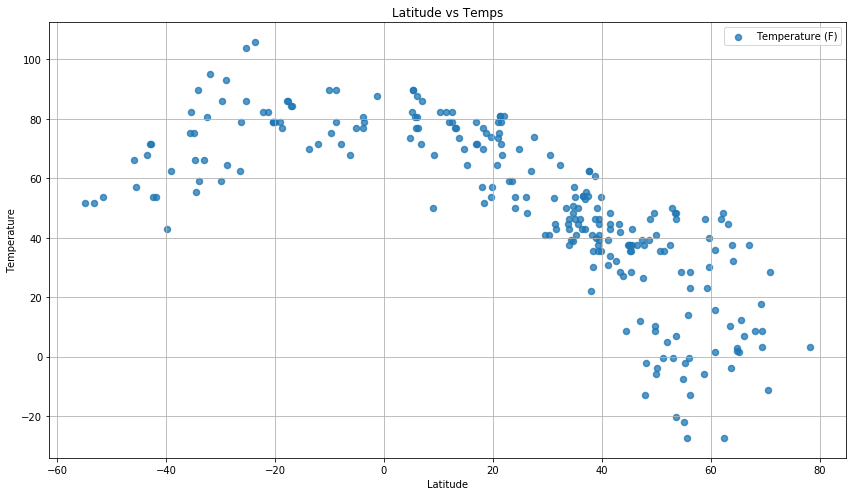

In [93]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Temperature (F)"], alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Temps")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="upper right")
plt.rcParams['figure.figsize']=(12,7)
plt.savefig("Temperature.png")




#### Latitude vs. Humidity Plot

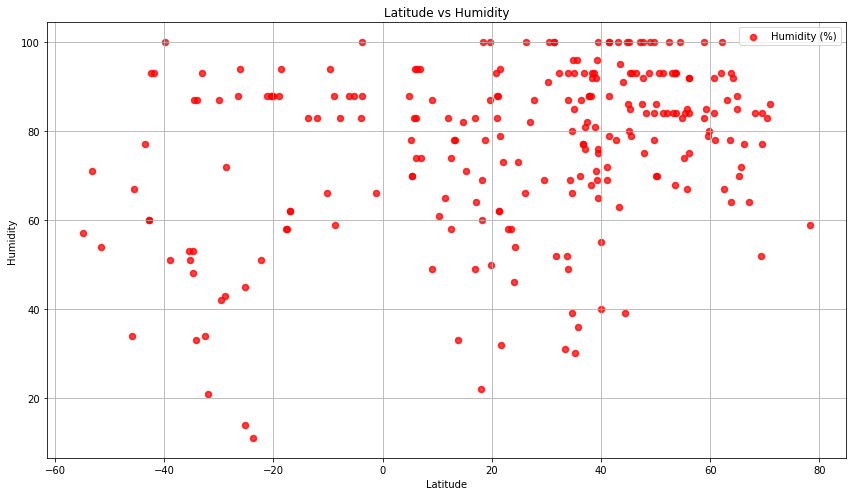

In [94]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Humidity (%)"], color = "red", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")
plt.rcParams['figure.figsize']=(12,7)

plt.savefig("Humidity.png")

#Show plot.
plt.show()

#### Latitude vs. Cloudiness Plot

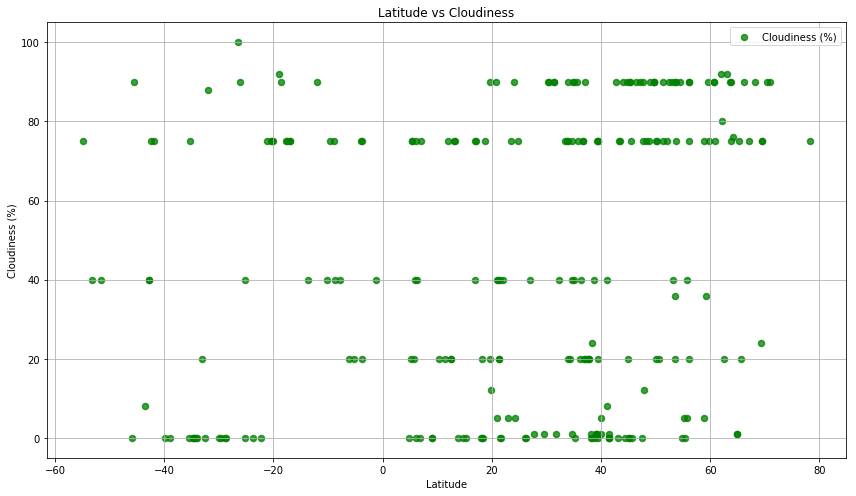

In [95]:
plt.scatter(clean_data_df["Latitude"], clean_data_df["Cloudiness (%)"], color = "green", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")
plt.rcParams['figure.figsize']=(12,7)
plt.savefig("Cloudiness.png")


#Show plot.
plt.show()

#### Latitude vs. Wind Speed Plot

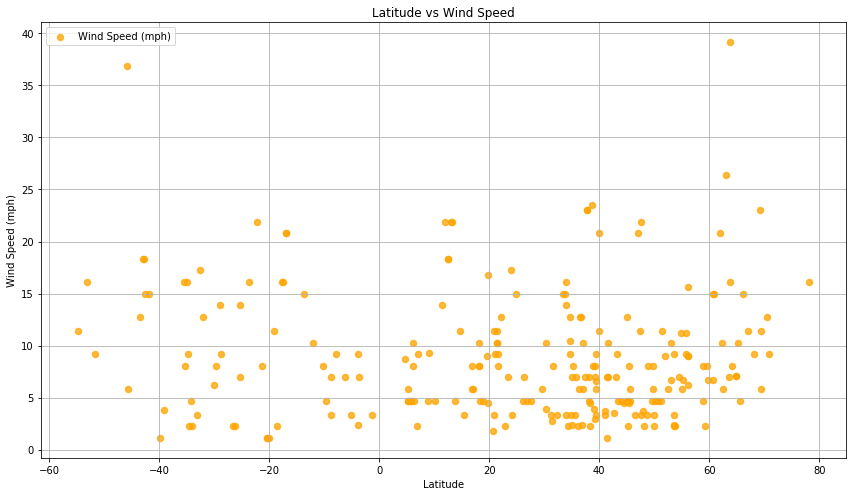

In [96]:
plt.scatter(clean_data_df["Latitude"], clean_data_df['Wind Speed (mph)'], color = "orange", alpha = 0.75, linewidth = 1.5)

#Add title, x axis label and y axis label.
plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.tight_layout()
plt.legend(loc="best")
plt.rcParams['figure.figsize']=(12,7)
plt.savefig("Wind Speed")

#Show plot.
plt.show()

In [135]:
clean_data_df.head()

,City,Country,City ID,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
3,touros,BR,8452.0,-5.20,-35.46,77.00,88.0,20.0,3.36
4,ixtapa,MX,7156.0,20.71,-105.21,64.40,93.0,90.0,1.81
5,albany,US,3797.0,42.65,-73.75,32.00,78.0,90.0,3.49
6,valparaiso,US,4876.0,41.47,-87.06,33.80,88.0,1.0,6.93
8,clyde river,CA,776.0,70.47,-68.59,-11.21,83.0,90.0,12.75


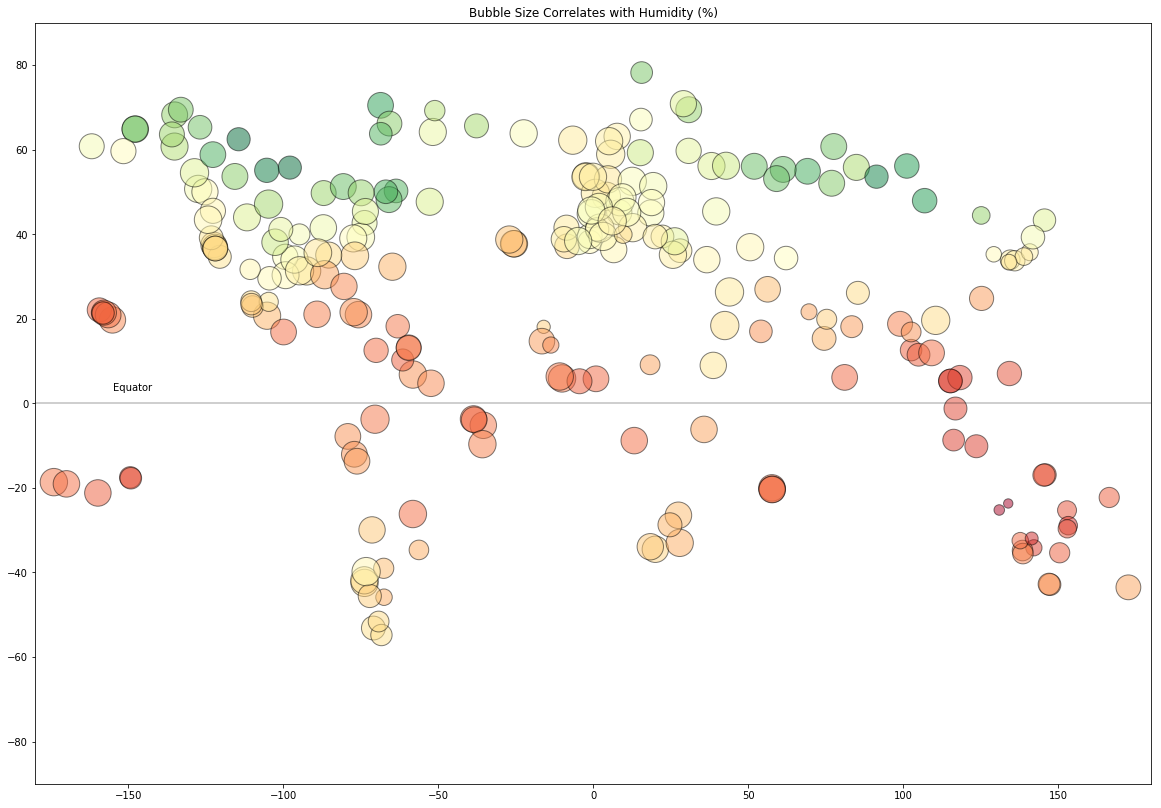

In [177]:
#graphs lats vs long, temperature scale from red(hot) to green(cool), and bubble size based on humidity, cloud cover, and wind speed
xvars = clean_data_df['Longitude']
yvars = clean_data_df['Latitude']
color = clean_data_df["Temperature (F)"]
bubble_size = ['Humidity (%)']


#loops through size list and only changes size of bubbles based on variables
for size in bubble_size:  
    plt.figure(figsize = (20,14))
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.title("Bubble Size Correlates with %s" % (bubble_size[0]))
    plt.axhline(0, color = 'black', alpha = .25, label = 'Equator')
    plt.text(-155,3,'Equator')
    bubble_size = clean_data_df[size]
    plt.scatter(xvars, 
                yvars, 
                c = color, 
                s = bubble_size * 8, 
                edgecolor = 'black', 
                linewidth = 1, 
                alpha = .5, 
                cmap=plt.cm.RdYlGn_r)
    
    plt.savefig('World Weather Map - Humidity')
    plt.show()
    


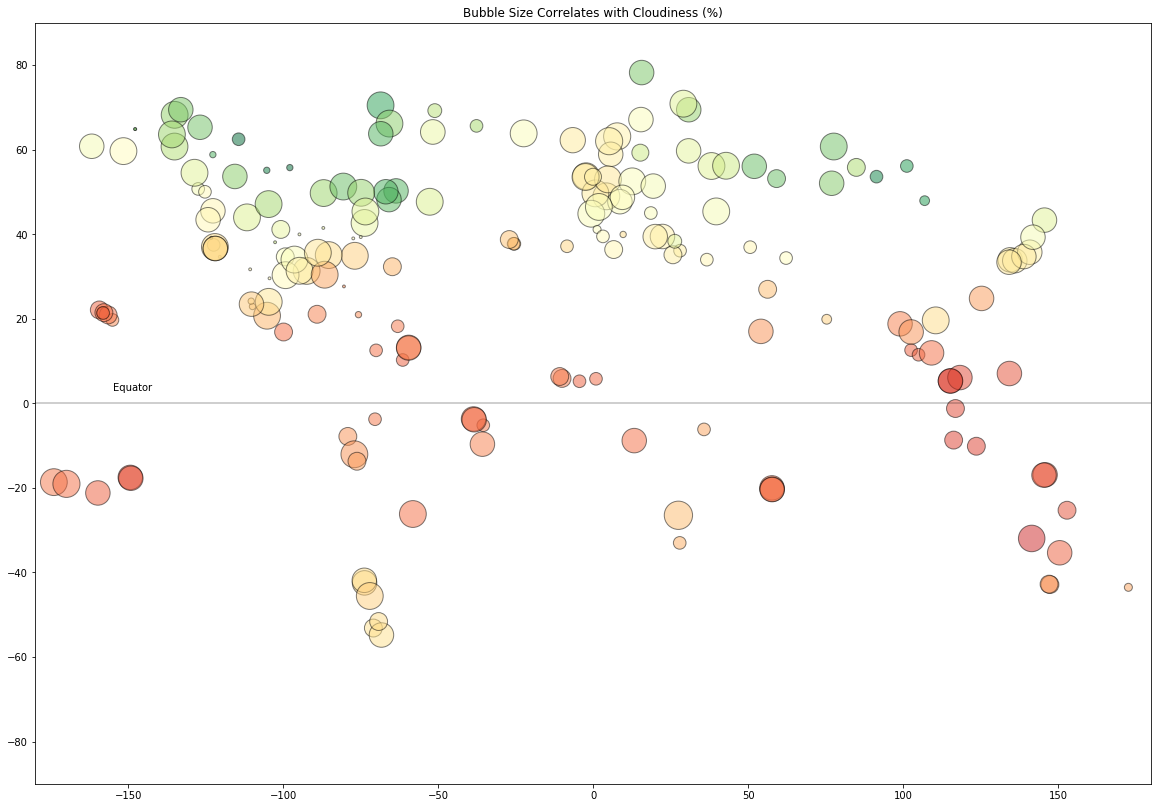

In [178]:
#graphs lats vs long, temperature scale from red(hot) to green(cool), and bubble size based on humidity, cloud cover, and wind speed
xvars = clean_data_df['Longitude']
yvars = clean_data_df['Latitude']
color = clean_data_df["Temperature (F)"]
bubble_size = ['Cloudiness (%)']


#loops through size list and only changes size of bubbles based on different variables
for size in bubble_size:  
    plt.figure(figsize = (20,14))
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.title("Bubble Size Correlates with %s" % (bubble_size[0]))
    plt.axhline(0, color = 'black', alpha = .25, label = 'Equator')
    plt.text(-155,3,'Equator')
    bubble_size = clean_data_df[size]
    plt.scatter(xvars, 
                yvars, 
                c = color, 
                s = bubble_size * 8, 
                edgecolor = 'black', 
                linewidth = 1, 
                alpha = .5, 
                cmap=plt.cm.RdYlGn_r)
    
    plt.savefig('World Weather Map - Cloudiness')
    plt.show()

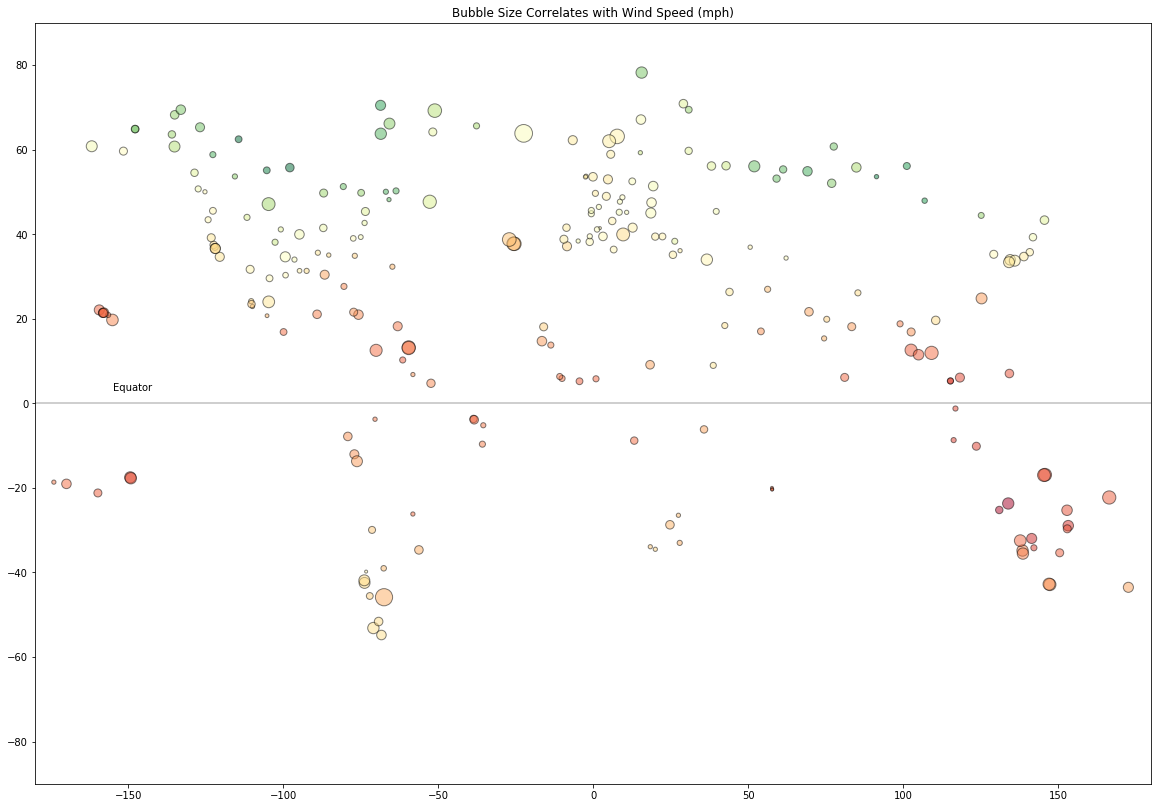

In [179]:

xvars = clean_data_df['Longitude']
yvars = clean_data_df['Latitude']
color = clean_data_df["Temperature (F)"]
bubble_size = ['Wind Speed (mph)']


for size in bubble_size:  
    plt.figure(figsize = (20,14))
    plt.xlim(-180,180)
    plt.ylim(-90,90)
    plt.title("Bubble Size Correlates with %s" % (bubble_size[0]))
    plt.axhline(0, color = 'black', alpha = .25, label = 'Equator')
    plt.text(-155,3,'Equator')
    bubble_size = clean_data_df[size]
    plt.scatter(xvars, 
                yvars, 
                c = color, 
                s = bubble_size * 8, 
                edgecolor = 'black', 
                linewidth = 1, 
                alpha = .5, 
                cmap=plt.cm.RdYlGn_r)
    
    plt.savefig('World Weather Map - Wind')
    plt.show()